# Linear Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [650]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [651]:
df = pd.read_csv("wine_data.csv",usecols=[0,1,2])

In [652]:
df.head()

,class_label,alcohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


### Histplt

<Axes: xlabel='alcohol', ylabel='Count'>

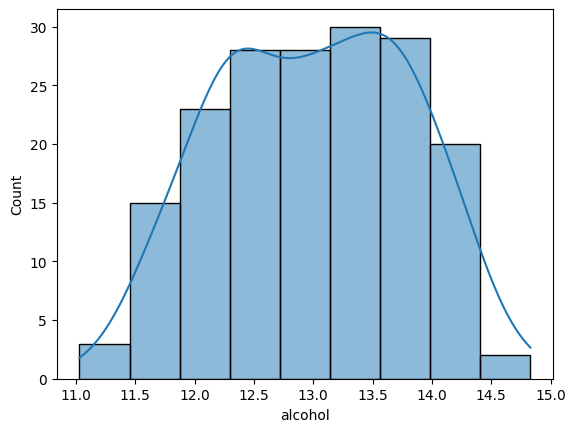

In [653]:
sns.histplot(df['alcohol'],kde=True)

<Axes: xlabel='alcohol', ylabel='Density'>

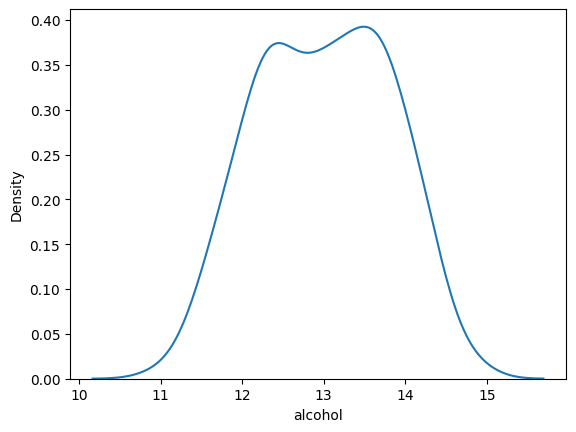

In [654]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='malic_acid', ylabel='Count'>

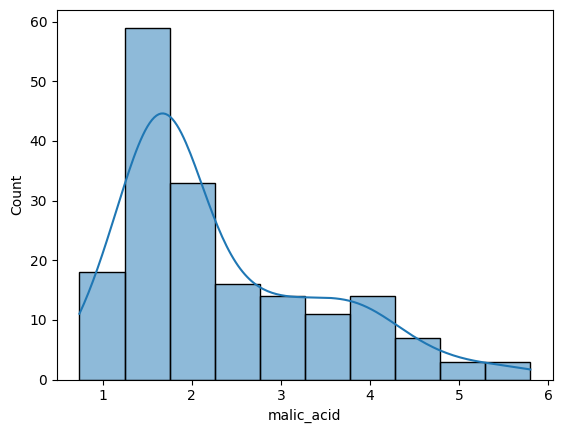

In [655]:
sns.histplot(df['malic_acid'],kde=True)

<Axes: xlabel='malic_acid', ylabel='Density'>

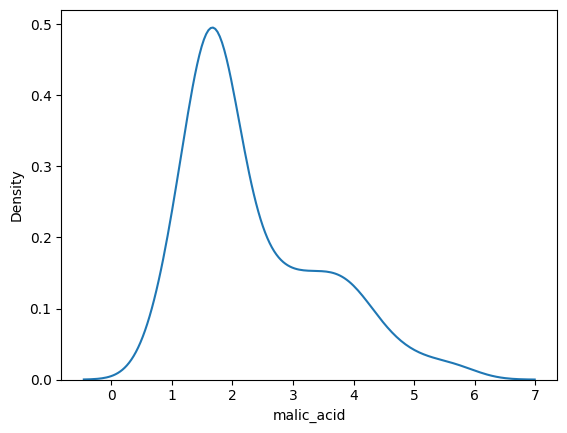

In [656]:
sns.kdeplot(df['malic_acid'])

<Axes: xlabel='alcohol', ylabel='malic_acid'>

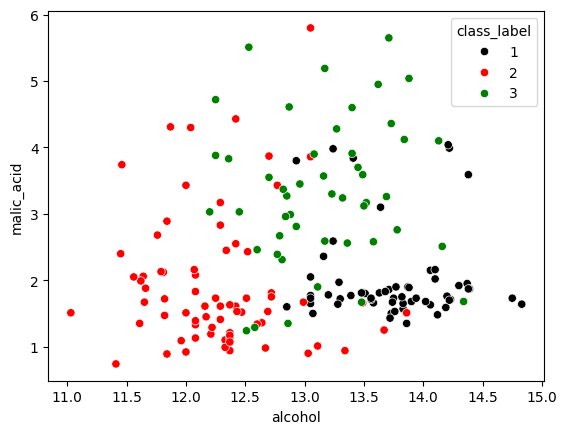

In [657]:
sns.scatterplot(x = df['alcohol'],y=df['malic_acid'],hue=df['class_label'],palette={1:'black',2:'red',3:'green'})

### Check Duplicated

In [658]:
df.duplicated().sum()

np.int64(0)

### Check Null Values

In [659]:
df.isnull().sum()

class_label    0
alcohol        0
malic_acid     0
dtype: int64

### Getting the inputs and output

In [660]:
X = df.iloc[:,1:].values


In [661]:
X_columns = df.columns[1:]


In [662]:
X_columns

Index(['alcohol', 'malic_acid'], dtype='object')

In [663]:
y = df.iloc[:,1].values

In [664]:
y

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 14.06, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39,
       13.3 , 13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48,
       13.28, 13.05, 13.07, 14.22, 13.56, 13.41, 13.88, 13.24, 13.05,
       14.21, 14.38, 13.9 , 14.1 , 13.94, 13.05, 13.83, 13.82, 13.77,
       13.74, 13.56, 14.22, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67,
       12.37, 12.17, 12.37, 13.11, 12.37, 13.34, 12.21, 12.29, 13.86,
       13.49, 12.99, 11.96, 11.66, 13.03, 11.84, 12.33, 12.7 , 12.  ,
       12.72, 12.08, 13.05, 11.84, 12.67, 12.16, 11.65, 11.64, 12.08,
       12.08, 12.  , 12.69, 12.29, 11.62, 12.47, 11.81, 12.29, 12.37,
       12.29, 12.08, 12.6 , 12.34, 11.82, 12.51, 12.42, 12.25, 12.72,
       12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 12.08, 11.03, 11.82,
       12.42, 12.77, 12.  , 11.45, 11.56, 12.42, 13.05, 11.87, 12.07,
       12.43, 11.79,

### Creating the Training Set and the Test Set

In [665]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class_label',axis = 1), df['class_label'], test_size = 0.25, random_state = 3)

In [666]:
X_train

,alcohol,malic_acid
12,13.75,1.73
14,14.38,1.87
24,13.50,1.81
151,12.79,2.67
73,12.99,1.67
...,...,...
21,12.93,3.80
0,14.23,1.71
131,12.88,2.99
152,13.11,1.90


In [667]:
X_test.shape

(45, 2)

In [668]:
y_train.shape

(133,)

In [669]:
y_test.shape

(45,)

### Normalazation Data

In [670]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [671]:
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

In [672]:
X_train_normalized = pd.DataFrame(sc.transform(X_train), columns=X_columns)

In [673]:
X_train_normalized.describe()

,alcohol,malic_acid
count,133.000000,133.000000
mean,0.468826,0.335701
std,0.235538,0.232918
min,0.000000,0.000000
25%,0.280702,0.175889
50%,0.479532,0.229249
75%,0.666667,0.498024
max,1.000000,1.000000


In [674]:
X_test_normalized = pd.DataFrame(sc.transform(X_test), columns=X_columns)

In [675]:
X_test_normalized.describe()

,alcohol,malic_acid
count,45.000000,45.000000
mean,0.454061,0.255731
std,0.245091,0.168654
min,-0.111111,0.029644
25%,0.269006,0.150198
50%,0.479532,0.201581
75%,0.634503,0.337945
max,0.871345,0.786561


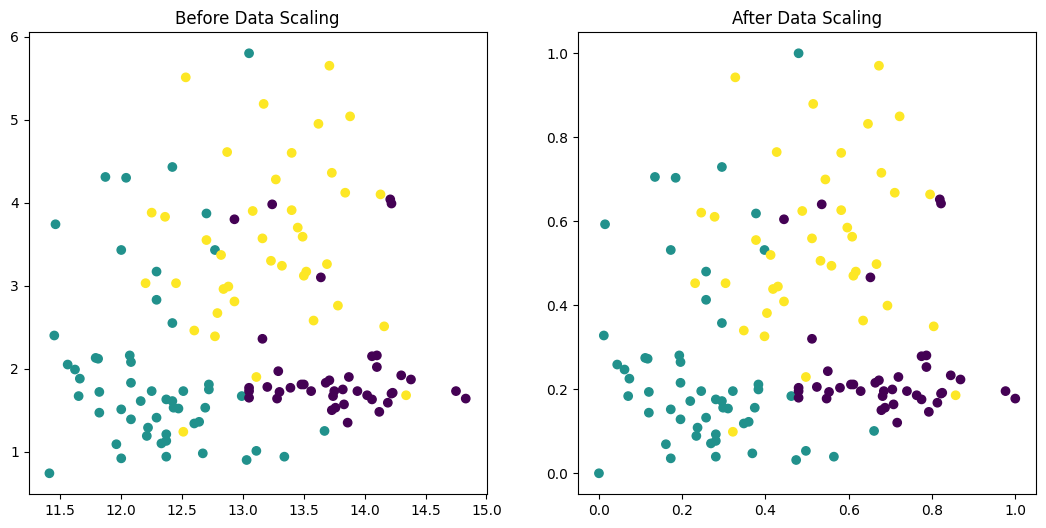

In [676]:

fig,(sub_fig1,sub_fig2) = plt.subplots(nrows=1,ncols=2,figsize=(13,6))
sub_fig1.set_title("Before Data Scaling")
sub_fig1.scatter(X_train['alcohol'],X_train['malic_acid'],c=y_train)
sub_fig2.set_title("After Data Scaling")
sub_fig2.scatter(X_train_normalized['alcohol'],X_train_normalized['malic_acid'],c=y_train)
plt.show()

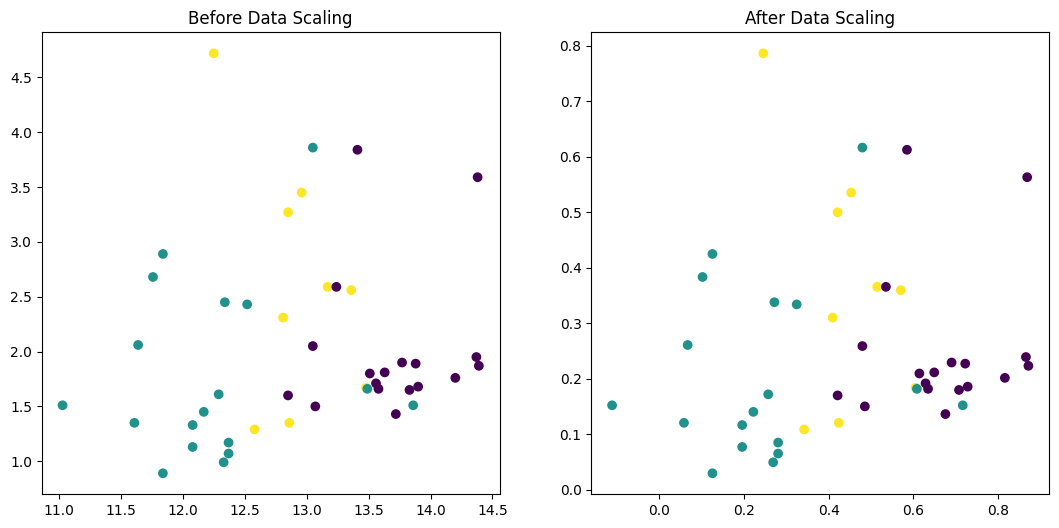

In [677]:
fig, (sub_fig1,sub_fig2) = plt.subplots(nrows=1,ncols=2,figsize = (13,6))
sub_fig1.set_title('Before Data Scaling')
sub_fig1.scatter(X_test['alcohol'],X_test['malic_acid'],c = y_test)
sub_fig2.set_title('After Data Scaling')
sub_fig2.scatter(X_test_normalized['alcohol'],X_test_normalized['malic_acid'],c = y_test)
plt.show()

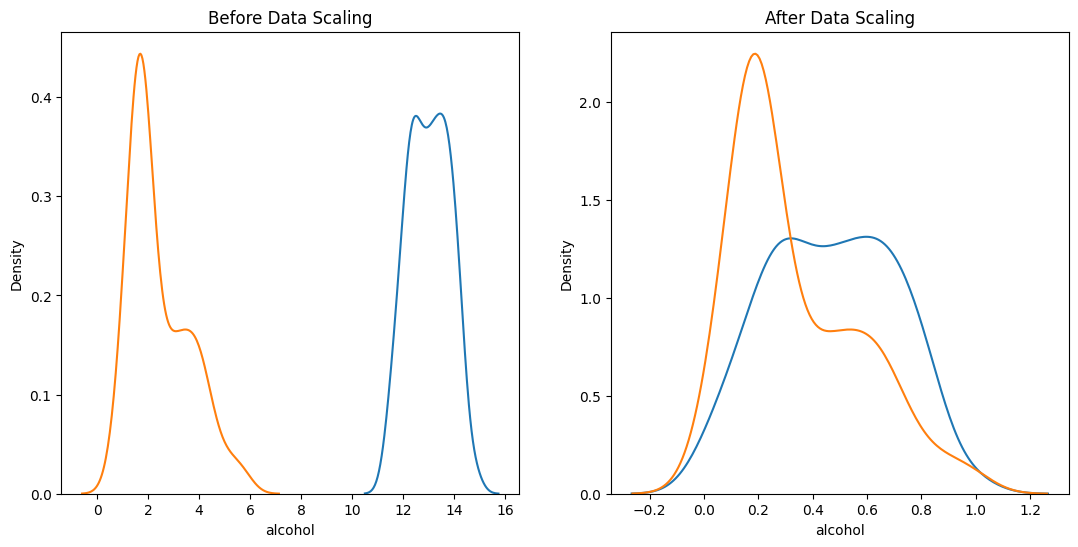

In [678]:
fig, (sub_fig1,sub_fig2) = plt.subplots(nrows=1,ncols=2,figsize = (13,6))
sub_fig1.set_title('Before Data Scaling')
sns.kdeplot(X_train['alcohol'],ax = sub_fig1)
sns.kdeplot(X_train['malic_acid'],ax = sub_fig1)
sub_fig2.set_title('After Data Scaling')
sns.kdeplot(X_train_normalized['alcohol'],ax = sub_fig2)
sns.kdeplot(X_train_normalized['malic_acid'],ax = sub_fig2)
plt.show()

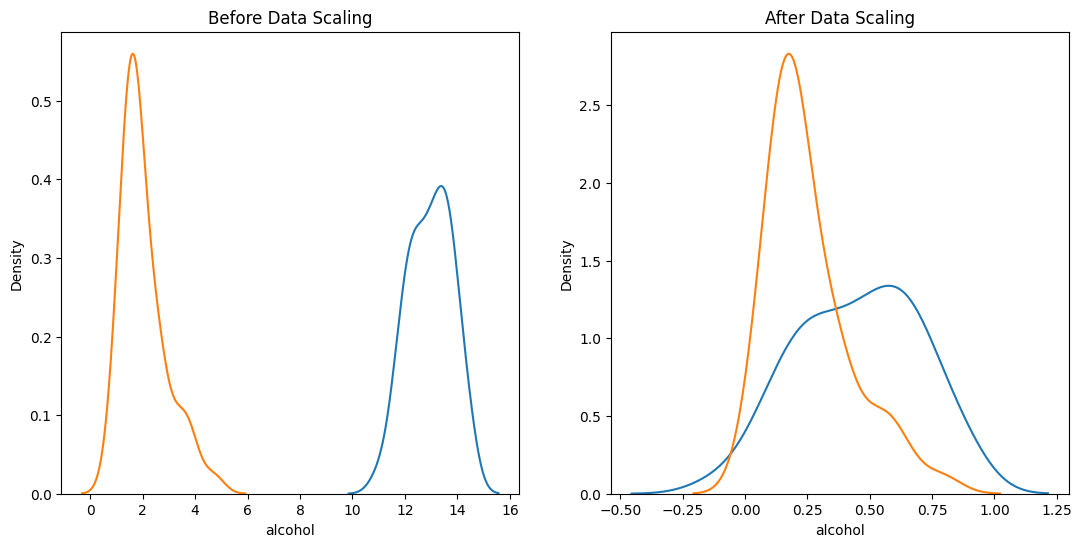

In [679]:
fig, (sub_fig1,sub_fig2) = plt.subplots(nrows=1,ncols=2,figsize = (13,6))
sub_fig1.set_title('Before Data Scaling')
sns.kdeplot(X_test['alcohol'],ax = sub_fig1)
sns.kdeplot(X_test['malic_acid'],ax = sub_fig1)
sub_fig2.set_title('After Data Scaling')
sns.kdeplot(X_test_normalized['alcohol'],ax = sub_fig2)
sns.kdeplot(X_test_normalized['malic_acid'],ax = sub_fig2)
plt.show()

## Part 2 - Building and training the model

### Building the model

In [680]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the model

In [681]:
history  = model.fit(X_train_normalized,y_train)

### Inference

Making the predictions of the data points in the test set

In [682]:
model.predict(X_test_normalized)

array([1.56016134, 1.5582611 , 1.60703315, 2.05981596, 1.57199974,
       1.74932135, 1.94338317, 1.56537132, 1.70613631, 1.64468499,
       1.91516366, 1.38366268, 1.83409037, 1.93173024, 1.45327461,
       1.34981133, 1.82841655, 1.57211346, 1.72920863, 2.34916253,
       1.41291751, 3.01199617, 1.83985998, 1.98685843, 1.39563274,
       2.30010313, 1.4411998 , 2.33920644, 1.90273872, 2.46112758,
       2.46838738, 1.96448637, 2.00580704, 1.72081162, 2.1396803 ,
       1.6603149 , 1.51967259, 1.7551358 , 1.53660724, 1.91583702,
       1.37277889, 2.3225351 , 2.29392959, 2.20407328, 2.51490008])

Making the prediction of a single data point with AT = 15, V = 40, AP = 1000, RH = 75

## Part 3: Evaluating the model

In [683]:
y_pred = model.predict(X_test_normalized)

In [684]:
y_pred

array([1.56016134, 1.5582611 , 1.60703315, 2.05981596, 1.57199974,
       1.74932135, 1.94338317, 1.56537132, 1.70613631, 1.64468499,
       1.91516366, 1.38366268, 1.83409037, 1.93173024, 1.45327461,
       1.34981133, 1.82841655, 1.57211346, 1.72920863, 2.34916253,
       1.41291751, 3.01199617, 1.83985998, 1.98685843, 1.39563274,
       2.30010313, 1.4411998 , 2.33920644, 1.90273872, 2.46112758,
       2.46838738, 1.96448637, 2.00580704, 1.72081162, 2.1396803 ,
       1.6603149 , 1.51967259, 1.7551358 , 1.53660724, 1.91583702,
       1.37277889, 2.3225351 , 2.29392959, 2.20407328, 2.51490008])

### intercept (c)

In [685]:
model.intercept_

np.float64(1.9143586481057775)

### coef(M)

In [686]:
model.coef_

array([-1.09303489,  1.73680334])

### R-Score

In [687]:
model.score(X_train_normalized,y_train)

0.3486546556603748

In [688]:
model.score(X_test_normalized,y_test)

0.2273249668897318

### R-Squared

In [689]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)

In [690]:
r2

0.2273249668897318

### Adjusted R-Squared

In [691]:
k = X_test_normalized.shape[1]
n = X_test_normalized.shape[0]
adj_r2 = 1 - (1-r2) * (n-1)/(n-k-1)

In [692]:
adj_r2

0.19053091769400476

### Loss 